In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('DataCognitive_Task2.csv',dtype={'sbj': str})

In [3]:
df

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu,size
0,0,8101004202,50.bmp,3.825690,p,1.0,r,r,r,m,22.0,2.0,NaN
1,1,8101004202,60.bmp,2.733858,p,7.0,r,r,r,m,22.0,2.0,NaN
2,2,8101004202,60.bmp,1.618684,p,2.0,r,r,r,m,22.0,2.0,NaN
3,3,8101004202,50.bmp,0.925664,o,10.0,r,r,r,m,22.0,2.0,NaN
4,4,8101004202,30.bmp,3.540292,o,7.0,r,r,r,m,22.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121690,1867,8101000632,50.bmp,0.454452,w,13.0,I,r,r,m,28.0,2.0,NaN
121691,1868,8101000632,70.bmp,0.345216,q,1.0,I,r,r,m,28.0,2.0,NaN
121692,1869,8101000632,0.bmp,0.395338,w,11.0,I,r,r,m,28.0,2.0,NaN
121693,1870,8101000632,70.bmp,0.416252,q,7.0,I,r,r,m,28.0,2.0,NaN


In [4]:
df.dtypes

Unnamed: 0      int64
sbj            object
stm            object
rt            float64
key            object
pos           float64
uhnd           object
hndns          object
eye            object
sex            object
age           float64
edu           float64
size          float64
dtype: object

In [5]:
df.shape

(121695, 13)

## cleaning data

In [6]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu,size
0,0,8101004202,50.bmp,3.825690,p,1.0,r,r,r,m,22.0,2.0,NaN
1,1,8101004202,60.bmp,2.733858,p,7.0,r,r,r,m,22.0,2.0,NaN
2,2,8101004202,60.bmp,1.618684,p,2.0,r,r,r,m,22.0,2.0,NaN
3,3,8101004202,50.bmp,0.925664,o,10.0,r,r,r,m,22.0,2.0,NaN
4,4,8101004202,30.bmp,3.540292,o,7.0,r,r,r,m,22.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121690,1867,8101000632,50.bmp,0.454452,w,13.0,I,r,r,m,28.0,2.0,NaN
121691,1868,8101000632,70.bmp,0.345216,q,1.0,I,r,r,m,28.0,2.0,NaN
121692,1869,8101000632,0.bmp,0.395338,w,11.0,I,r,r,m,28.0,2.0,NaN
121693,1870,8101000632,70.bmp,0.416252,q,7.0,I,r,r,m,28.0,2.0,NaN


In [7]:
df.isna().sum()

Unnamed: 0         0
sbj                4
stm               15
rt                12
key               15
pos             1770
uhnd              16
hndns              4
eye                5
sex                4
age                4
edu                7
size          116079
dtype: int64

In [8]:
df1 = df.drop('size',1)
df1.isna().sum()

Unnamed: 0       0
sbj              4
stm             15
rt              12
key             15
pos           1770
uhnd            16
hndns            4
eye              5
sex              4
age              4
edu              7
dtype: int64

In [9]:
df2 = df1.dropna(axis=0, subset=['pos'])
df2.isna().sum()

Unnamed: 0    0
sbj           0
stm           0
rt            0
key           0
pos           0
uhnd          1
hndns         0
eye           1
sex           0
age           0
edu           0
dtype: int64

In [10]:
df2.shape

(119925, 12)

In [11]:
df3 = df1.dropna()

In [12]:
df3

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu
0,0,8101004202,50.bmp,3.825690,p,1.0,r,r,r,m,22.0,2.0
1,1,8101004202,60.bmp,2.733858,p,7.0,r,r,r,m,22.0,2.0
2,2,8101004202,60.bmp,1.618684,p,2.0,r,r,r,m,22.0,2.0
3,3,8101004202,50.bmp,0.925664,o,10.0,r,r,r,m,22.0,2.0
4,4,8101004202,30.bmp,3.540292,o,7.0,r,r,r,m,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121690,1867,8101000632,50.bmp,0.454452,w,13.0,I,r,r,m,28.0,2.0
121691,1868,8101000632,70.bmp,0.345216,q,1.0,I,r,r,m,28.0,2.0
121692,1869,8101000632,0.bmp,0.395338,w,11.0,I,r,r,m,28.0,2.0
121693,1870,8101000632,70.bmp,0.416252,q,7.0,I,r,r,m,28.0,2.0


In [13]:
df4 = df3.copy()
df4['rt'] = np.where((df3['sbj'] == '8101003761') | (df3['sbj'] == '8101003762'),df3['rt']/1000,df3['rt'])

In [14]:
Q1 = df4['rt'].quantile(0.25)
Q3 = df4['rt'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.3046759149991183

In [15]:
outliers = df4[(df4['rt'] > Q3+1.5*IQR) | (df4['rt'] < Q1-1.5*IQR)]
outliers

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu
0,0,8101004202,50.bmp,3.825690,p,1.0,r,r,r,m,22.0,2.0
1,1,8101004202,60.bmp,2.733858,p,7.0,r,r,r,m,22.0,2.0
2,2,8101004202,60.bmp,1.618684,p,2.0,r,r,r,m,22.0,2.0
4,4,8101004202,30.bmp,3.540292,o,7.0,r,r,r,m,22.0,2.0
7,7,8101004202,80.bmp,1.273948,p,1.0,r,r,r,m,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121476,1653,8101000632,20.bmp,1.678312,w,10.0,I,r,r,m,28.0,2.0
121484,1661,8101000632,70.bmp,1.686291,w,3.0,I,r,r,m,28.0,2.0
121486,1663,8101000632,80.bmp,1.669011,q,1.0,I,r,r,m,28.0,2.0
121584,1761,8101000632,70.bmp,1.290593,w,3.0,I,r,r,m,28.0,2.0


In [16]:
df4 = df4[(df4['rt'] <= Q3+1.5*IQR) & (df4['rt'] >= Q1-1.5*IQR)]
df4.shape

(112114, 12)

In [17]:
df5 = df4[(df4['rt'] < 2) & (df4['rt'] > 0.1)]
df5.shape

(110292, 12)

### correction of sbj

In [18]:
df6 = df5.copy()
df6['sbj'] = np.where(df5['sbj'] == '8101004763.0','8101004763',df5['sbj'])

### correction of stm

In [19]:
df6['stm'] = np.where(df5['stm'].str.startswith('Supplementary Material'),df5['stm'].str.replace('Supplementary Material/',''),df5['stm'])

### correction of position

In [20]:
wrong_pos = df5[(df5['pos']==0)]['sbj'].unique()
wrong_pos

array(['8101000195', '8101000192', '8101000194', '8101000193',
       '8101000191'], dtype=object)

In [21]:
df6['pos'] = np.where(df5['sbj'].isin(wrong_pos),df5['pos']+1,df5['pos'])

### correction of uhnd

In [22]:
df6[(df6['uhnd']!='r') & (df6['uhnd']!='l')]['sbj'].unique()

array(['8101000635', '8101000634', '8101000631', '8101000633',
       '8101004122', '8101000632'], dtype=object)

In [23]:
df6[(df6['sbj']=='8101000635')]

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu
67401,1,8101000635,20.bmp,1.041683,p,11.0,r,r,l,f,27.0,4.0
67402,2,8101000635,0.bmp,0.850041,p,12.0,r,r,l,f,27.0,4.0
67404,4,8101000635,80.bmp,0.884245,o,7.0,r,r,l,f,27.0,4.0
67405,5,8101000635,10.bmp,0.980454,p,8.0,r,r,l,f,27.0,4.0
67406,6,8101000635,60.bmp,0.849149,o,10.0,r,r,l,f,27.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69267,1867,8101000635,80.bmp,0.733161,q,12.0,I,r,l,f,27.0,4.0
69268,1868,8101000635,0.bmp,0.587849,q,10.0,I,r,l,f,27.0,4.0
69269,1869,8101000635,30.bmp,0.756740,w,8.0,I,r,l,f,27.0,4.0
69270,1870,8101000635,70.bmp,1.188477,q,3.0,I,r,l,f,27.0,4.0


In [24]:
df6[(df6['sbj']=='8101004122')]

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu
117951,0,8101004122,80.bmp,0.151043,w,4.0,0.bmp,l,l,m,28.0,3.0
117952,1,8101004122,60.bmp,0.213842,w,8.0,10.bmp,l,l,m,28.0,3.0
117953,2,8101004122,30.bmp,0.259610,q,6.0,10.bmp,l,l,m,28.0,3.0
117954,3,8101004122,20.bmp,0.268186,w,10.0,10.bmp,l,l,m,28.0,3.0
117955,4,8101004122,70.bmp,0.315639,q,6.0,10.bmp,l,l,m,28.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119703,1752,8101004122,30.bmp,1.246160,p,12.0,0.bmp,l,l,m,28.0,3.0
119704,1753,8101004122,30.bmp,1.246317,p,2.0,10.bmp,l,l,m,28.0,3.0
119705,1754,8101004122,0.bmp,1.248348,o,5.0,10.bmp,l,l,m,28.0,3.0
119706,1755,8101004122,20.bmp,1.248454,p,4.0,0.bmp,l,l,m,28.0,3.0


In [25]:
left_key = ['w','q']
df6['uhnd'] = np.where(df6['key'].isin(left_key),'l','r')

In [26]:
df6

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu
3,3,8101004202,50.bmp,0.925664,o,10.0,r,r,r,m,22.0,2.0
5,5,8101004202,70.bmp,1.163995,o,6.0,r,r,r,m,22.0,2.0
6,6,8101004202,50.bmp,1.023112,o,9.0,r,r,r,m,22.0,2.0
8,8,8101004202,80.bmp,0.970425,o,10.0,r,r,r,m,22.0,2.0
14,14,8101004202,60.bmp,1.175144,p,13.0,r,r,r,m,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121690,1867,8101000632,50.bmp,0.454452,w,13.0,l,r,r,m,28.0,2.0
121691,1868,8101000632,70.bmp,0.345216,q,1.0,l,r,r,m,28.0,2.0
121692,1869,8101000632,0.bmp,0.395338,w,11.0,l,r,r,m,28.0,2.0
121693,1870,8101000632,70.bmp,0.416252,q,7.0,l,r,r,m,28.0,2.0


In [27]:
clean_df = df6.copy()

In [28]:
clean_df['rt'] = clean_df['rt']*1000

In [29]:
clean_df['lrt']= np.log(clean_df['rt'])

In [30]:
clean_df

,Unnamed: 0,sbj,stm,rt,key,pos,uhnd,hndns,eye,sex,age,edu,lrt
3,3,8101004202,50.bmp,925.664400,o,10.0,r,r,r,m,22.0,2.0,6.830512
5,5,8101004202,70.bmp,1163.995200,o,6.0,r,r,r,m,22.0,2.0,7.059614
6,6,8101004202,50.bmp,1023.111800,o,9.0,r,r,r,m,22.0,2.0,6.930604
8,8,8101004202,80.bmp,970.425000,o,10.0,r,r,r,m,22.0,2.0,6.877734
14,14,8101004202,60.bmp,1175.144300,p,13.0,r,r,r,m,22.0,2.0,7.069146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121690,1867,8101000632,50.bmp,454.452038,w,13.0,l,r,r,m,28.0,2.0,6.119092
121691,1868,8101000632,70.bmp,345.216036,q,1.0,l,r,r,m,28.0,2.0,5.844170
121692,1869,8101000632,0.bmp,395.338058,w,11.0,l,r,r,m,28.0,2.0,5.979741
121693,1870,8101000632,70.bmp,416.251898,q,7.0,l,r,r,m,28.0,2.0,6.031291


<AxesSubplot:>

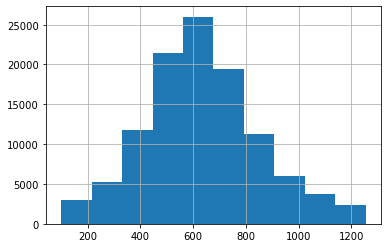

In [31]:
clean_df['rt'].hist()

## exploring the data

In [32]:
def generate_corr_ans(row):  
    if row['stm'] in ['0.bmp','10.bmp','20.bmp','30.bmp']:
        if((row['uhnd']=='r' and row['key']=='p') or (row['uhnd']=='l' and row['key']=='w')):
            return 1
        else:
            return 0 
    elif row['stm'] in ['50.bmp','60.bmp','70.bmp','80.bmp']:
        if((row['uhnd']=='r' and row['key']=='o') or (row['uhnd']=='l' and row['key']=='q')):
            return 1
        else:
            return 0 
    return -1

def generate_ecc(row):
    if row['pos'] == 1:
        return 0
    elif row['pos'] in np.arange(2, 8, 1.0):
        return 1
    else:
        return 2
    
def generate_vf(row):
    if row['pos'] == 1:
        return 0
    elif row['pos'] in [2,8,13]:
        return 1
    elif row['pos'] in [3,4,9]:
        return 2
    elif row['pos'] in [5,10,11]:
        return 3
    else:
        return 4

In [33]:
clean_df['corr_ans'] =  clean_df.apply(lambda row: generate_corr_ans(row), axis=1)

In [34]:
clean_df['dhnd'] = np.where(clean_df['uhnd'] == clean_df['hndns'],1,0)

In [35]:
clean_df['ecc'] = clean_df.apply(lambda row: generate_ecc(row), axis=1)

In [36]:
clean_df['vf'] = clean_df.apply(lambda row: generate_vf(row), axis=1)

In [37]:
acc_df = (clean_df[clean_df['corr_ans']!=-1]).groupby('sbj')['corr_ans'].mean()
acc_dic = acc_df.to_dict()
clean_df['acc'] = clean_df['sbj'].replace(acc_dic)

In [38]:
clean_df['acc'] = clean_df['sbj'].replace(acc_dic)
clean_df['acc'] = clean_df['acc']*100
clean_df['loc'] = clean_df['pos'].astype(int)

In [39]:
data = clean_df[['sbj','rt','lrt','acc','loc','ecc','vf','uhnd','dhnd','sex','hndns','eye','corr_ans']].copy()

### rt

                ---------------- rt ~ loc ----------------

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.110
Date:                Fri, 08 Apr 2022   Prob (F-statistic):             0.0134
Time:                        15:57:22   Log-Likelihood:            -7.5069e+05
No. Observations:              110292   AIC:                         1.501e+06
Df Residuals:                  110279   BIC:                         1.502e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 1.508e-05
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.997
Time:                        15:57:27   Log-Likelihood:            -7.5070e+05
No. Observations:              110292   AIC:                         1.501e+06
Df Residuals:                  110290   BIC:                         1.501e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    633.8543      0.929    682.163      0.0

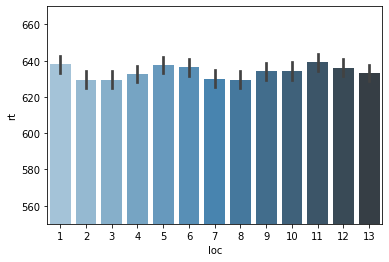

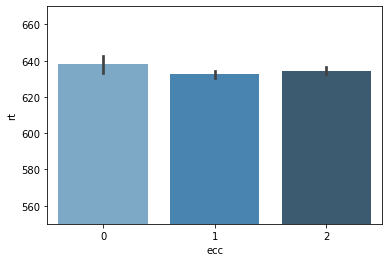

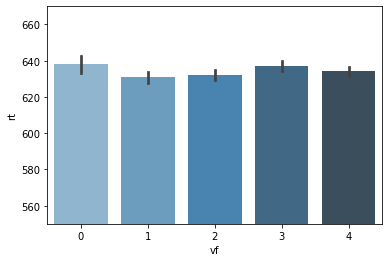

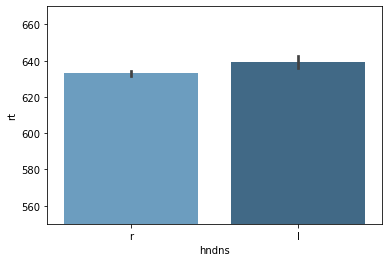

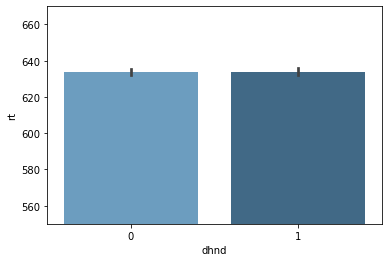

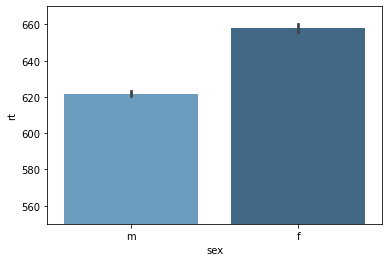

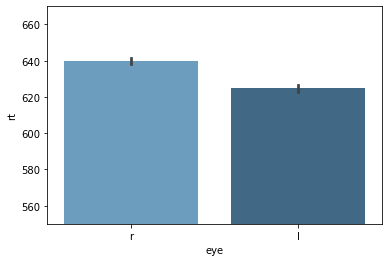

In [40]:
dependent = ['loc','ecc','vf','hndns','dhnd','sex','eye']
cat = ['loc','ecc','vf']
for var in dependent:
    print('                ---------------- rt ~ '+var+ ' ----------------\n')
    plt.figure()
    plot = sns.barplot(x = data[var], y = data['rt'],palette="Blues_d")
    plot.set(ylim=(550,670))
    if(var in cat):
        model = ols('rt ~ '+"C("+var+')', data= data).fit()
    else:
        model = ols('rt ~ '+var, data= data).fit()
    print(model.summary())
    print('\n')

### acc

                ---------------- acc ~ loc ----------------

                            OLS Regression Results                            
Dep. Variable:                    acc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7591
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.694
Time:                        15:57:32   Log-Likelihood:            -3.9893e+05
No. Observations:              110292   AIC:                         7.979e+05
Df Residuals:                  110279   BIC:                         7.980e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    acc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.855
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.173
Time:                        15:57:37   Log-Likelihood:            -3.9894e+05
No. Observations:              110292   AIC:                         7.979e+05
Df Residuals:                  110290   BIC:                         7.979e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1401      0.038   1544.917      0.0

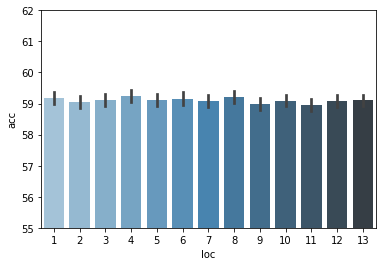

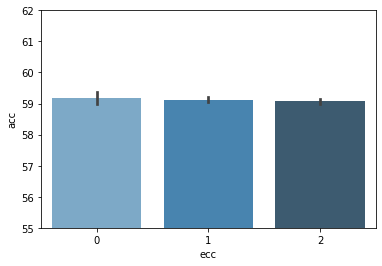

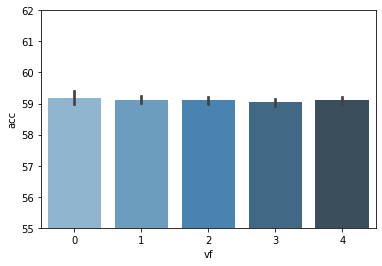

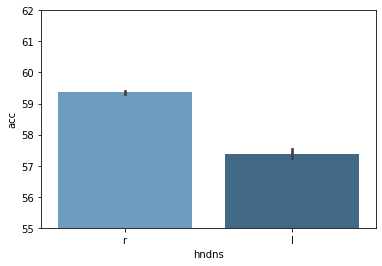

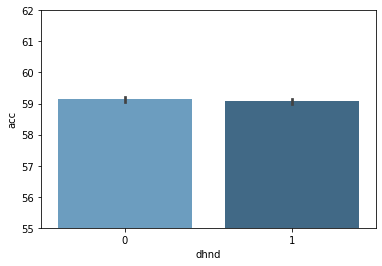

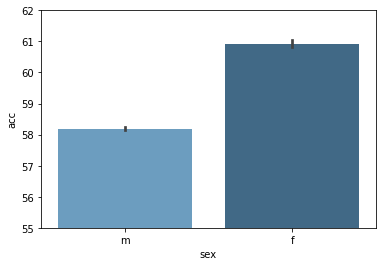

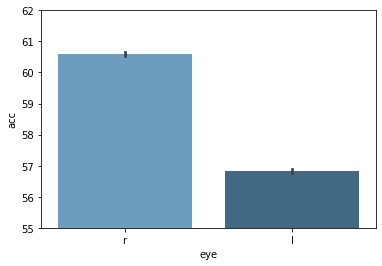

In [41]:
dependent = ['loc','ecc','vf','hndns','dhnd','sex','eye']
for var in dependent:
    print('                ---------------- acc ~ '+var+ ' ----------------\n')
    plt.figure()
    plot = sns.barplot(x = data[var], y = data['acc'],palette="Blues_d")
    plot.set(ylim=(55,62))
    if(var in cat):
        model = ols('acc ~ '+"C("+var+')', data= data).fit()
    else:
        model = ols('acc ~ '+var, data= data).fit()
    print(model.summary())
    print('\n')

                ---------------- rt ~ C(ecc) + hndns + C(ecc)*hndns ----------------

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.017
Date:                Fri, 08 Apr 2022   Prob (F-statistic):             0.0100
Time:                        15:57:42   Log-Likelihood:            -7.5069e+05
No. Observations:              110292   AIC:                         1.501e+06
Df Residuals:                  110286   BIC:                         1.501e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

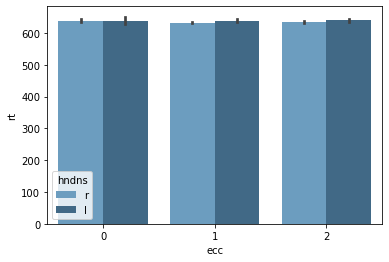

In [42]:
print('                ---------------- rt ~ C(ecc) + hndns + C(ecc)*hndns ----------------\n')
sns.barplot(x = data['ecc'], y = data['rt'],hue=data['hndns'],palette="Blues_d")
model = ols('rt ~ C(ecc) + hndns + C(ecc)*hndns', data= data).fit()
print(model.summary())
print('\n')

                ---------------- acc ~ eye + sex + eye*sex ----------------

                            OLS Regression Results                            
Dep. Variable:                    acc   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     4041.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:57:44   Log-Likelihood:            -3.9319e+05
No. Observations:              110292   AIC:                         7.864e+05
Df Residuals:                  110288   BIC:                         7.864e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

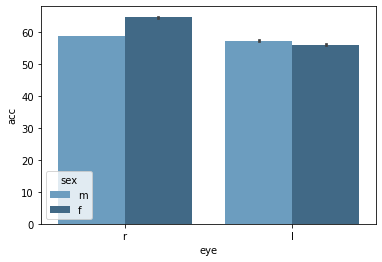

In [43]:
print('                ---------------- acc ~ eye + sex + eye*sex ----------------\n')
sns.barplot(x = data['eye'], y = data['acc'],hue=data['sex'],palette="Blues_d")
model = ols('acc ~ eye + sex + eye*sex', data= data).fit()
print(model.summary())
print('\n')

### Prediction of Behavioral Characteristics

### acc

<AxesSubplot:>

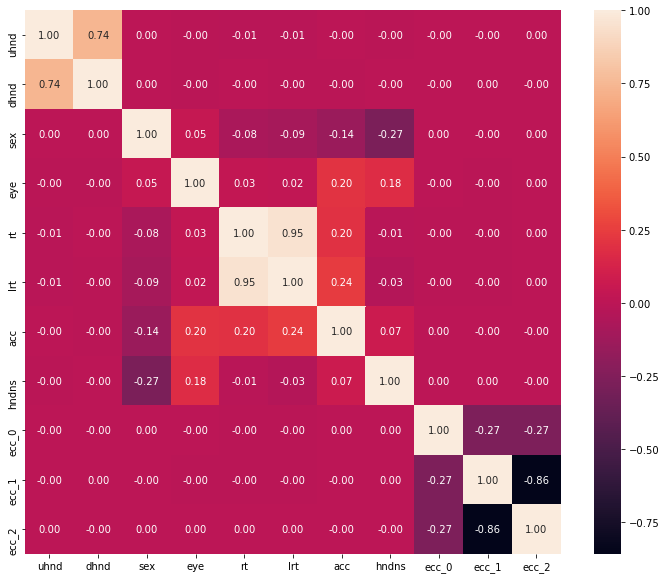

In [44]:
from sklearn.preprocessing import OneHotEncoder
hmp = data[['ecc','uhnd','dhnd','sex','eye','rt','lrt','acc']].copy()
hmp['uhnd'] = data['uhnd'].replace({'r':1,'l':0})
hmp['eye'] = data['eye'].replace({'r':1,'l':0})
hmp['sex'] = data['sex'].replace({'m':1,'f':0})
hmp['hndns'] = data['hndns'].replace({'r':1,'l':0})
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_ecc = pd.DataFrame(encoder.fit_transform(hmp[['ecc']]).toarray(),columns=['ecc_'+str(i) for i in range (0,3)])
hmp = hmp.join(encoder_ecc)
hmp.drop('ecc', axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(hmp.corr(), annot = True, fmt = '.2f')

### 1

In [45]:
data = data.reset_index(drop=True)
x = data[['loc','ecc','vf','uhnd','dhnd','sex','eye','hndns']].copy()
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_loc = pd.DataFrame(encoder.fit_transform(x[['loc']]).toarray(),columns=['loc_'+str(i) for i in range (1,14)])
encoder_ecc = pd.DataFrame(encoder.fit_transform(x[['ecc']]).toarray(),columns=['ecc_'+str(i) for i in range (0,3)])
encoder_vf = pd.DataFrame(encoder.fit_transform(x[['vf']]).toarray(),columns=['vf_'+str(i) for i in range (0,5)])
x = x.join([encoder_vf,encoder_ecc,encoder_loc])
#merge one-hot encoded columns back with original DataFrame
x['uhnd'] = data['uhnd'].replace({'r':1,'l':0})
x['eye'] = data['eye'].replace({'r':1,'l':0})
x['sex'] = data['sex'].replace({'m':1,'f':0})
x['hndns'] = data['hndns'].replace({'r':1,'l':0})
y = data['acc']
x.drop(['loc','ecc','vf'], axis=1, inplace=True)
#x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acc   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     446.6
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:57:46   Log-Likelihood:            -3.9527e+05
No. Observations:              110292   AIC:                         7.906e+05
Df Residuals:                  110274   BIC:                         7.907e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
uhnd           0.0703      0.095      0.740      0.459      -0.116       0.256
dhnd          -0.1071      0.100     -1.075      0.282      -0.302       0.088
sex           -2.9866      0.081    -36.992      0.000      -3.145      -2.828
eye            3.9036      0.071     54.884      0.000       3.764       4.043
hndns         -0.1475      0.101     -1.462      0.144      -0.345       0.050
vf_0           -1e+11   3.99e+11     -0.251      0.802   -8.82e+11    6.82e+11
vf_1       -4.119e+11   4.12e+12     -0.100      0.920   -8.48e+12    7.66e+12
vf_2       -3.798e+10   5.98e+12     -0.006      0.995   -1.18e+13    1.17e+13
vf_3        1.067e+12   3.46e+12      0.308      0.758   -5.71e+12    7.85e+12
vf_4       -1.803e+12   5.71e+12     -0.316      0.752    -1.3e+13    9.39e+12
ecc_0       5.084e+10   2.01e+11      0.253      0.800   -3.43e+11    4.45e+11
ecc_1       2.505e+09    3.2e+12      0.001      0.999   -6.26e+12    6.26e+12
ecc_2       1.024e+12   3.14e+12      0.326      0.745   -5.14e+12    7.19e+12
loc_1       4.919e+10   1.98e+11      0.248      0.804   -3.39e+11    4.38e+11
loc_2       4.094e+11   5.52e+12      0.074      0.941   -1.04e+13    1.12e+13
loc_3       3.547e+10   5.95e+12      0.006      0.995   -1.16e+13    1.17e+13
loc_4       3.547e+10   5.95e+12      0.006      0.995   -1.16e+13    1.17e+13
loc_5      -1.069e+12   3.91e+12     -0.274      0.784   -8.73e+12    6.59e+12
loc_6       1.801e+12   6.81e+12      0.265      0.791   -1.15e+13    1.51e+13
loc_7       1.801e+12   6.81e+12      0.265      0.791   -1.15e+13    1.51e+13
loc_8      -6.119e+11   5.95e+12     -0.103      0.918   -1.23e+13     1.1e+13
loc_9      -9.859e+11    5.4e+12     -0.183      0.855   -1.16e+13     9.6e+12
loc_10      -2.09e+12   5.13e+12     -0.408      0.683   -1.21e+13    7.96e+12
loc_11      -2.09e+12   5.13e+12     -0.408      0.683   -1.21e+13    7.96e+12
loc_12      7.794e+11   6.05e+12      0.129      0.897   -1.11e+13    1.26e+13
loc_13     -6.119e+11   5.95e+12     -0.103      0.918   -1.23e+13     1.1e+13
==============================================================================
Omnibus:                    14970.129   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21794.984
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       3.506   Cond. No.                     1.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 2

In [46]:
data = data.reset_index(drop=True)
x = data[['loc','ecc','vf','uhnd','dhnd','sex','eye','hndns']].copy()
x['uhnd'] = data['uhnd'].replace({'r':1,'l':0})
x['eye'] = data['eye'].replace({'r':1,'l':0})
x['sex'] = data['sex'].replace({'m':1,'f':0})
x['hndns'] = data['hndns'].replace({'r':1,'l':0})
y = data['acc']
x.drop(['loc','ecc','vf'], axis=1, inplace=True)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    acc   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                          2.219e+05
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:57:46   Log-Likelihood:                     -4.7515e+05
No. Observations:              110292   AIC:                                  9.503e+05
Df Residuals:                  110287   BIC:                                  9.504e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
uhnd           4.8890      0.160     30.559      0.000       4.575       5.203
dhnd           4.7006      0.160     29.381      0.000       4.387       5.014
sex           16.9243      0.099    171.522      0.000      16.731      17.118
eye            8.9219      0.112     79.900      0.000       8.703       9.141
hndns         38.4551      0.107    359.852      0.000      38.246      38.665
==============================================================================
Omnibus:                     5731.964   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6654.316
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       2.890   Cond. No.                         5.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3

In [47]:
data = data.reset_index(drop=True)
x = data[['loc','ecc','vf','uhnd','dhnd','sex','eye']].copy()
x['uhnd'] = data['uhnd'].replace({'r':1,'l':0})
x['eye'] = data['eye'].replace({'r':1,'l':0})
x['sex'] = data['sex'].replace({'m':1,'f':0})
#x['hndns'] = data['hndns'].replace({'r':1,'l':0})
y = data['acc']
x.drop(['loc','ecc','vf'], axis=1, inplace=True)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    acc   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                          1.127e+05
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:57:46   Log-Likelihood:                     -5.1798e+05
No. Observations:              110292   AIC:                                  1.036e+06
Df Residuals:                  110288   BIC:                                  1.036e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
uhnd          12.2220      0.234     52.236      0.000      11.763      12.681
dhnd          12.1599      0.234     51.985      0.000      11.701      12.618
sex           27.8080      0.138    200.800      0.000      27.537      28.079
eye           29.3872      0.142    207.400      0.000      29.110      29.665
==============================================================================
Omnibus:                     6223.698   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2864.483
Skew:                           0.192   Prob(JB):                         0.00
Kurtosis:                       2.310   Cond. No.                         5.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4

In [48]:
data = data.reset_index(drop=True)
x = data[['loc','ecc','vf','hndns']].copy()
x['eye'] = data['eye'].replace({'r':1,'l':0})
x['sex'] = data['sex'].replace({'m':1,'f':0})
x['hndns'] = data['hndns'].replace({'r':1,'l':0})
y = data['acc']
x.drop(['loc','ecc','vf'], axis=1, inplace=True)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    acc   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          3.441e+05
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:57:47   Log-Likelihood:                     -4.7874e+05
No. Observations:              110292   AIC:                                  9.575e+05
Df Residuals:                  110289   BIC:                                  9.575e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hndns         41.8573      0.103    407.995      0.000      41.656      42.058
eye            9.3393      0.115     81.033      0.000       9.113       9.565
sex           18.7107      0.100    187.739      0.000      18.515      18.906
==============================================================================
Omnibus:                     7583.739   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9272.658
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       2.942   Cond. No.                         3.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### rt

In [49]:
data = data.reset_index(drop=True)
x = data[['loc','ecc','vf','sex','eye','hndns']].copy()
x['uhnd'] = data['uhnd'].replace({'r':1,'l':0})
x['eye'] = data['eye'].replace({'r':1,'l':0})
x['sex'] = data['sex'].replace({'m':1,'f':0})
x['hndns'] = data['hndns'].replace({'r':1,'l':0})
y = data['rt']
x.drop(['loc','ecc','vf'], axis=1, inplace=True)
#x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     rt   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                          1.267e+05
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:57:47   Log-Likelihood:                     -7.7933e+05
No. Observations:              110292   AIC:                                  1.559e+06
Df Residuals:                  110288   BIC:                                  1.559e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex          188.4172      1.552    121.432      0.000     185.376     191.458
eye           78.6212      1.761     44.658      0.000      75.171      82.072
hndns        420.6396      1.671    251.762      0.000     417.365     423.914
uhnd          92.3877      1.645     56.163      0.000      89.164      95.612
==============================================================================
Omnibus:                      465.109   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.659
Skew:                           0.159   Prob(JB):                    6.27e-103
Kurtosis:                       2.965   Cond. No.                         3.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### lrt

In [50]:
from sklearn.preprocessing import OneHotEncoder
data = data.reset_index(drop=True)
x = data[['loc','ecc','vf','uhnd','dhnd','eye','hndns']].copy()
encoder = OneHotEncoder(handle_unknown='ignore')
#merge one-hot encoded columns back with original DataFrame
x['uhnd'] = data['uhnd'].replace({'r':1,'l':0})
x['eye'] = data['eye'].replace({'r':1,'l':0})
x['sex'] = data['sex'].replace({'m':1,'f':0})
x['hndns'] = data['hndns'].replace({'r':1,'l':0})
y = data['lrt']
x.drop(['loc','ecc','vf'], axis=1, inplace=True)
#x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    lrt   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.618e+05
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:57:47   Log-Likelihood:                     -2.2025e+05
No. Observations:              110292   AIC:                                  4.405e+05
Df Residuals:                  110287   BIC:                                  4.406e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
uhnd           0.5121      0.016     32.282      0.000       0.481       0.543
dhnd           0.5442      0.016     34.309      0.000       0.513       0.575
eye            0.5853      0.011     52.865      0.000       0.564       0.607
hndns          4.1798      0.011    394.480      0.000       4.159       4.201
sex            2.1017      0.010    214.826      0.000       2.083       2.121
==============================================================================
Omnibus:                     9285.629   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.283
Skew:                           0.441   Prob(JB):                         0.00
Kurtosis:                       2.294   Cond. No.                         5.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'rt hist')

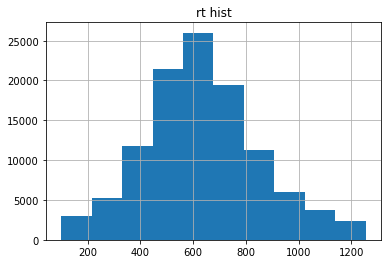

In [51]:
data['rt'].hist()
plt.title('rt hist')

Text(0.5, 1.0, 'lrt hist')

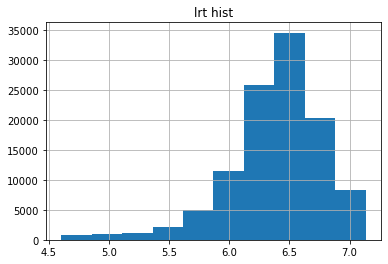

In [52]:
data['lrt'].hist()
plt.title('lrt hist')

Text(0.5, 1.0, 'acc hist')

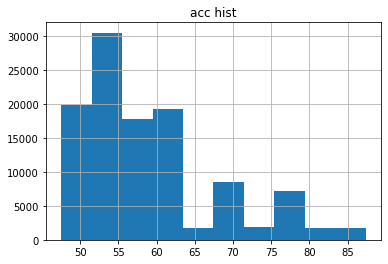

In [53]:
data['acc'].hist()
plt.title('acc hist')

[(50.0, 62.0)]

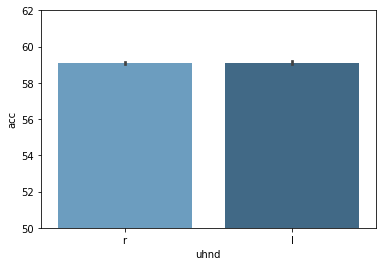

In [54]:
plot = sns.barplot(x = data['uhnd'], y = data['acc'],palette="Blues_d")
plot.set(ylim=(50,62))

[(50.0, 62.0)]

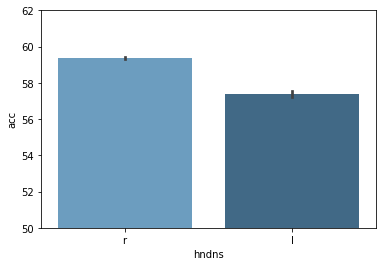

In [55]:
plot = sns.barplot(x = data['hndns'], y = data['acc'],palette="Blues_d")
plot.set(ylim=(50,62))

### Psychometric Fitting

In [56]:
psych_data = clean_df[['sbj','stm','ecc','vf','acc','loc','rt']].copy()
psych_data['resp'] = clean_df['key'].replace({'o':1,'q':1,'p':0,'w':0})
psych_data['stm'] = clean_df['stm'].replace({'0.bmp':1,'10.bmp':2,'20.bmp':3,'30.bmp':4,'40.bmp':5,'50.bmp':6,'60.bmp':7,'70.bmp':8,'80.bmp':9})

In [57]:
def generate_pse(sbj):
    sbj_data = psych_data[psych_data['sbj']==sbj]
    value = 0.5
    info = [sbj]
    for var in ['loc','ecc','vf']:
        start = 0
        if var == 'loc':
            end = 14
            start = 1
        if var == 'ecc':
            end = 3
        if var == 'vf':
            end = 5
        for i in range(start,end):
            try:
                x = sbj_data[(sbj_data[var]==i)]['stm'].to_numpy().reshape(-1,1)
                y = sbj_data[(sbj_data[var]==i)]['resp']
                model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
                x_in = np.linspace(1,9,9).reshape(-1,1)
                pred = np.array(model.predict_proba(x_in)[:,1])
                idx = (np.abs(pred - value)).argmin()
                #boolean_array = np.logical_and(pred > 0.47, pred < 0.53 )
                #idx = np.where(boolean_array)[0][0]
                pse = x_in[idx][0]
                info.append(pse)
            except:
                info.append(-1)
    return info
    

In [58]:
sbjs = psych_data['sbj'].unique()
info = []
for sbj in sbjs:
    info.append(generate_pse(sbj))
pse_df = pd.DataFrame(info, columns =['sbj']+['loc'+str(i) for i in range(1,14)]+['ecc'+str(i) for i in range(0,3)]+['vf'+str(i) for i in range(0,5)]) 

In [59]:
pse_df

,sbj,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,...,loc12,loc13,ecc0,ecc1,ecc2,vf0,vf1,vf2,vf3,vf4
0,8101004202,9.0,9.0,9.0,6.0,1.0,2.0,9.0,6.0,4.0,...,1.0,7.0,9.0,7.0,2.0,9.0,8.0,6.0,1.0,3.0
1,8106973112,6.0,9.0,1.0,-1.0,9.0,1.0,7.0,1.0,5.0,...,9.0,1.0,6.0,1.0,9.0,6.0,9.0,1.0,1.0,9.0
2,8101004201,6.0,6.0,5.0,5.0,6.0,6.0,5.0,4.0,5.0,...,4.0,4.0,6.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0
3,8101005022,9.0,9.0,4.0,5.0,3.0,6.0,5.0,6.0,5.0,...,1.0,8.0,9.0,5.0,4.0,9.0,8.0,5.0,2.0,4.0
4,8101990531,9.0,6.0,9.0,8.0,9.0,1.0,5.0,1.0,1.0,...,9.0,9.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,8101000633,9.0,1.0,9.0,1.0,9.0,1.0,1.0,1.0,9.0,...,9.0,1.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,9.0
61,8101003282,9.0,8.0,9.0,4.0,4.0,7.0,9.0,9.0,9.0,...,9.0,8.0,9.0,7.0,9.0,9.0,9.0,9.0,4.0,9.0
62,8101003791,9.0,9.0,9.0,1.0,9.0,1.0,1.0,1.0,9.0,...,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0
63,8101004122,7.0,5.0,7.0,7.0,5.0,9.0,5.0,1.0,4.0,...,1.0,2.0,7.0,6.0,1.0,7.0,2.0,6.0,2.0,1.0


In [60]:
def draw_plot(sbj,var):
    start = 0
    if var == 'loc':
        end = 14
        start = 1
    if var == 'ecc':
        end = 3
    if var == 'vf':
        end = 5
    for i in range(start,end):
        x = psych_data[(psych_data[var]==i) & (psych_data['sbj']==sbj)]['stm'].to_numpy().reshape(-1,1)
        y = psych_data[(psych_data[var]==i) & (psych_data['sbj']==sbj)]['resp']
        model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
        x_in = np.linspace(-10,15,100).reshape(-1,1)
        pred = np.array(model.predict_proba(x_in)[:,1])
        plt.plot(x_in, pred,label = var+str(i))
        plt.legend()
        plt.xlabel('stimuli')
        plt.ylabel('proportion of female response')
    plt.plot(x_in, [0.5]*100)
    plt.show()
   

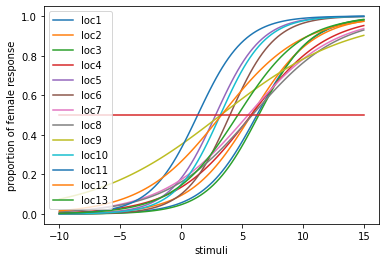

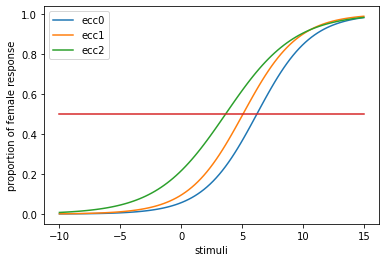

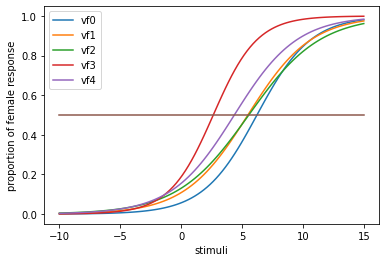

In [61]:
sbj = '8106973111'
draw_plot(sbj,'loc')
draw_plot(sbj,'ecc')
draw_plot(sbj,'vf')

### ANOVA  TEST 

In [62]:
def generate_anova_data(var):
    start = 0
    if var == 'loc':
        end = 14
        start = 1
    if var == 'ecc':
        end = 3
    if var == 'vf':
        end = 5
    pse_dict = pse_df.to_dict();
    var_list = [var+str(i) for i in range(start,end)]
    r = len(pse_dict[var_list[0]])
    var_info = []
    for j in range(0,r):
        for element in var_list:
            var_info.append([pse_dict['sbj'][j],pse_dict[element][j],element])
    var_df = pd.DataFrame(var_info, columns = ['sbj','pse',var])
    return var_df

In [63]:
loc_df = generate_anova_data('loc')
ecc_df = generate_anova_data('ecc')
vf_df = generate_anova_data('vf')

In [64]:
loc_df

,sbj,pse,loc
0,8101004202,9.0,loc1
1,8101004202,9.0,loc2
2,8101004202,9.0,loc3
3,8101004202,6.0,loc4
4,8101004202,1.0,loc5
...,...,...,...
840,8101000632,9.0,loc9
841,8101000632,9.0,loc10
842,8101000632,1.0,loc11
843,8101000632,5.0,loc12


In [65]:
ecc_df

,sbj,pse,ecc
0,8101004202,9.0,ecc0
1,8101004202,7.0,ecc1
2,8101004202,2.0,ecc2
3,8106973112,6.0,ecc0
4,8106973112,1.0,ecc1
...,...,...,...
190,8101004122,6.0,ecc1
191,8101004122,1.0,ecc2
192,8101000632,5.0,ecc0
193,8101000632,1.0,ecc1


In [66]:
vf_df

,sbj,pse,vf
0,8101004202,9.0,vf0
1,8101004202,8.0,vf1
2,8101004202,6.0,vf2
3,8101004202,1.0,vf3
4,8101004202,3.0,vf4
...,...,...,...
320,8101000632,5.0,vf0
321,8101000632,7.0,vf1
322,8101000632,9.0,vf2
323,8101000632,2.0,vf3


#### loc

In [67]:
print('                ---------------- pse ~ loc ----------------\n')
model = ols('pse ~ C(loc)', data= loc_df).fit()
print(model.summary())
print('\n')

                ---------------- pse ~ loc ----------------

                            OLS Regression Results                            
Dep. Variable:                    pse   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.575
Date:                Fri, 08 Apr 2022   Prob (F-statistic):             0.0933
Time:                        15:57:54   Log-Likelihood:                -2189.4
No. Observations:                 845   AIC:                             4405.
Df Residuals:                     832   BIC:                             4466.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [68]:
print('                ---------------- pse ~ ecc ----------------\n')
model = ols('pse ~ C(ecc)', data= ecc_df).fit()
print(model.summary())
print('\n')

                ---------------- pse ~ ecc ----------------

                            OLS Regression Results                            
Dep. Variable:                    pse   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1190
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.888
Time:                        15:57:54   Log-Likelihood:                -484.67
No. Observations:                 195   AIC:                             975.3
Df Residuals:                     192   BIC:                             985.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [69]:
print('                ---------------- pse ~ vf ----------------\n')
model = ols('pse ~ C(vf)', data= vf_df).fit()
print(model.summary())
print('\n')

                ---------------- pse ~ vf ----------------

                            OLS Regression Results                            
Dep. Variable:                    pse   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.040
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.387
Time:                        15:57:55   Log-Likelihood:                -820.54
No. Observations:                 325   AIC:                             1651.
Df Residuals:                     320   BIC:                             1670.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### PERMUTATION TEST

In [70]:
sbj = '8101005262'

In [71]:
def generate_null_dist(sbj):
    sbj_data = psych_data[psych_data['sbj']==sbj]
    null_dist = []
    value = 0.5
    for j in range(0,100):
        mutate = sbj_data.copy()
        mutate['resp'] = np.random.permutation(sbj_data['resp'].values)
        info = []
        for var in ['loc','ecc','vf']:
            start = 0
            if var == 'loc':
                end = 14
                start = 1
            if var == 'ecc':
                end = 3
            if var == 'vf':
                end = 5
            for i in range(start,end):
                try:
                    x = sbj_data[(sbj_data[var]==i)]['stm'].to_numpy().reshape(-1,1)
                    y = mutate[(mutate[var]==i)]['resp']
                    model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
                    x_in = np.linspace(1,9,9).reshape(-1,1)
                    pred = np.array(model.predict_proba(x_in)[:,1])
                    idx = (np.abs(pred - value)).argmin()
                #boolean_array = np.logical_and(pred > 0.47, pred < 0.53 )
                #idx = np.where(boolean_array)[0][0]
                    pse = x_in[idx][0]
                    info.append(pse)
                except:
                    info.append(-1)
        null_dist.append(info)
    return  pd.DataFrame(null_dist, columns =['loc'+str(i) for i in range(1,14)]+['ecc'+str(i) for i in range(0,3)]+['vf'+str(i) for i in range(0,5)])
    

In [72]:
null_dist = generate_null_dist(sbj)

In [73]:
null_dist

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,...,loc12,loc13,ecc0,ecc1,ecc2,vf0,vf1,vf2,vf3,vf4
0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,9.0,1.0,1.0,...,9.0,1.0,9.0,1.0,9.0,9.0,9.0,1.0,1.0,9.0
1,1.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,...,1.0,9.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0
2,9.0,1.0,1.0,1.0,9.0,9.0,9.0,1.0,1.0,1.0,...,9.0,1.0,9.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0
3,9.0,1.0,9.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,...,1.0,9.0,9.0,1.0,1.0,9.0,1.0,1.0,9.0,1.0
4,1.0,9.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,...,9.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,9.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0,...,9.0,9.0,1.0,1.0,9.0,1.0,9.0,1.0,9.0,1.0
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,...,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0
97,9.0,1.0,9.0,9.0,9.0,1.0,9.0,1.0,1.0,9.0,...,1.0,9.0,9.0,9.0,1.0,9.0,1.0,9.0,1.0,1.0
98,1.0,1.0,1.0,9.0,1.0,9.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0


In [74]:
def find_pvalue(sbj):
    cols = ['loc'+str(i) for i in range(1,14)]+['ecc'+str(i) for i in range(0,3)]+['vf'+str(i) for i in range(0,5)]
    sbj_pse = generate_pse(sbj)
    pvalue = {}
    for idx,col in enumerate(cols):
        pvalue[col] = sum(i > sbj_pse[idx+1] for i in null_dist[col]) / 100
    return pvalue

In [75]:
find_pvalue('8101000632')

{'loc1': 0.39,
 'loc2': 0.0,
 'loc3': 0.41,
 'loc4': 0.0,
 'loc5': 0.41,
 'loc6': 0.0,
 'loc7': 0.45,
 'loc8': 0.36,
 'loc9': 0.0,
 'loc10': 0.0,
 'loc11': 0.4,
 'loc12': 0.34,
 'loc13': 0.0,
 'ecc0': 0.39,
 'ecc1': 0.49,
 'ecc2': 0.39,
 'vf0': 0.39,
 'vf1': 0.34,
 'vf2': 0.0,
 'vf3': 0.36,
 'vf4': 0.42}

In [76]:
find_pvalue('8101005262')

{'loc1': 0.39,
 'loc2': 0.42,
 'loc3': 0.41,
 'loc4': 0.4,
 'loc5': 0.0,
 'loc6': 0.0,
 'loc7': 0.45,
 'loc8': 0.37,
 'loc9': 0.32,
 'loc10': 0.0,
 'loc11': 0.39,
 'loc12': 0.35,
 'loc13': 0.4,
 'ecc0': 0.39,
 'ecc1': 0.0,
 'ecc2': 0.39,
 'vf0': 0.39,
 'vf1': 0.34,
 'vf2': 0.4,
 'vf3': 0.0,
 'vf4': 0.42}

### BOOT STRAP

In [77]:
sbj = '8106973111'

In [78]:
def boot_strap_data(sbj):
    sbj_data = psych_data[psych_data['sbj']==sbj]
    boot_dist = []
    value = 0.5
    for j in range(0,100):
        info = []
        boot_data = sbj_data.sample(n = len(sbj_data), replace = True)
        for var in ['loc','ecc','vf']:
            start = 0
            if var == 'loc':
                end = 14
                start = 1
            if var == 'ecc':
                end = 3
            if var == 'vf':
                end = 5
            for i in range(start,end):
                try:
                    x = boot_data[(boot_data[var]==i)]['stm'].to_numpy().reshape(-1,1)
                    y = boot_data[(boot_data[var]==i)]['resp']
                    model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
                    x_in = np.linspace(1,9,9).reshape(-1,1)
                    pred = np.array(model.predict_proba(x_in)[:,1])
                    idx = (np.abs(pred - value)).argmin()
                #boolean_array = np.logical_and(pred > 0.47, pred < 0.53 )
                #idx = np.where(boolean_array)[0][0]
                    pse = x_in[idx][0]
                    info.append(pse)
                except:
                    info.append(-1)
        boot_dist.append(info)
    return  pd.DataFrame(boot_dist, columns =['loc'+str(i) for i in range(1,14)]+['ecc'+str(i) for i in range(0,3)]+['vf'+str(i) for i in range(0,5)])
    

In [79]:
boot = boot_strap_data(sbj)

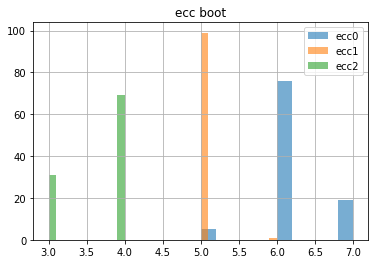

In [80]:
columns =['ecc'+str(i) for i in range(0,3)]
for col in columns: 
    boot[col].hist(label=col,alpha=0.6)
    plt.legend()
    plt.title('ecc boot')

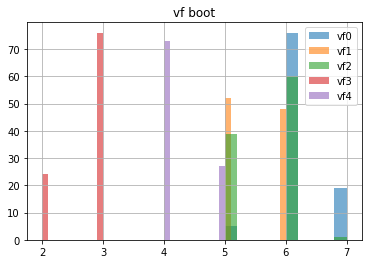

In [81]:
columns =['vf'+str(i) for i in range(0,5)]
for col in columns: 
    boot[col].hist(label=col,alpha=0.6)
    plt.legend()
    plt.title('vf boot')

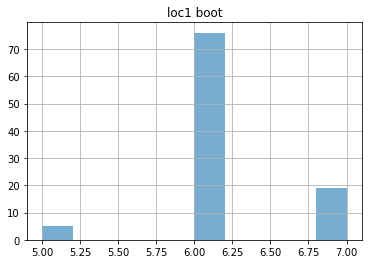

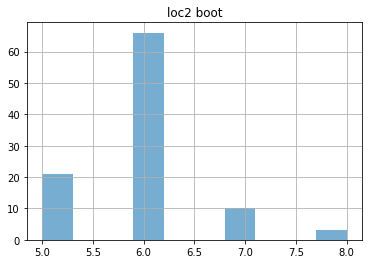

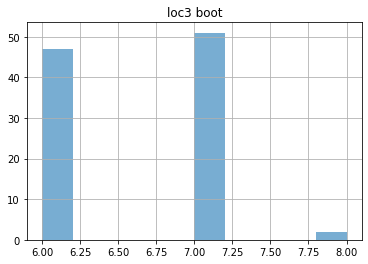

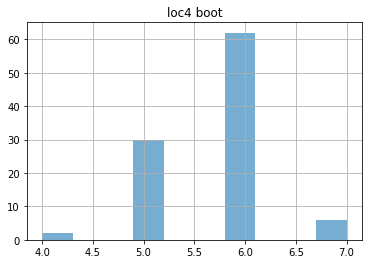

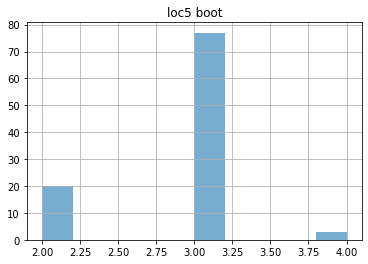

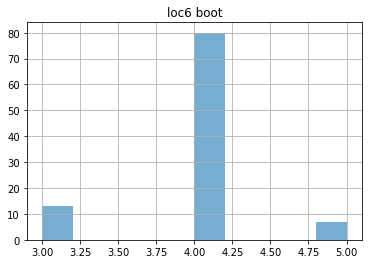

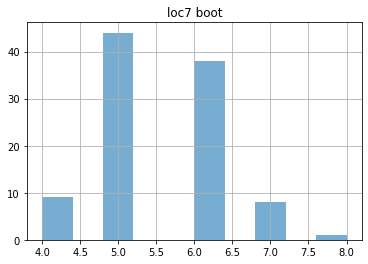

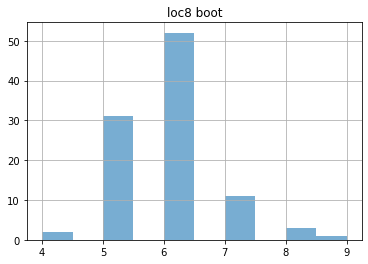

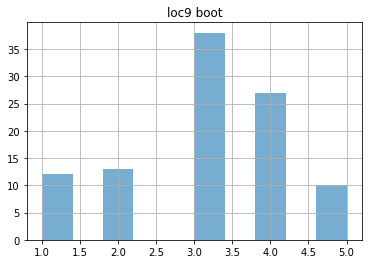

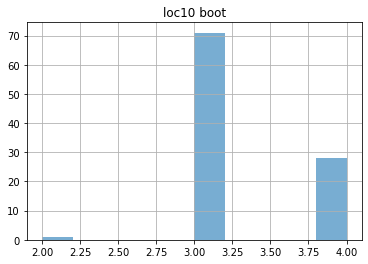

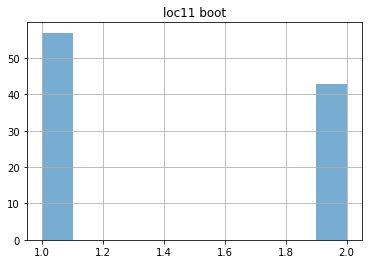

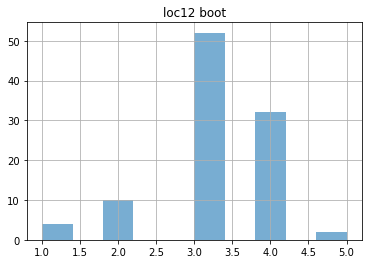

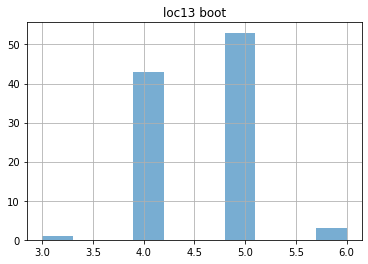

In [82]:
columns =['loc'+str(i) for i in range(1,14)]
for col in columns: 
    boot[col].hist(label=col,alpha=0.6)
    plt.title(col+' boot')
    plt.show()

In [83]:
boot.std()

loc1     0.471833
loc2     0.657129
loc3     0.538891
loc4     0.604361
loc5     0.450701
loc6     0.445403
loc7     0.810038
loc8     0.833333
loc9     1.132620
loc10    0.468287
loc11    0.497570
loc12    0.796203
loc13    0.571724
ecc0     0.471833
ecc1     0.100000
ecc2     0.464823
vf0      0.471833
vf1      0.502117
vf2      0.508116
vf3      0.429235
vf4      0.446196
dtype: float64

## Spread of PSEs

In [84]:
vf_dict = {0:['loc1'],1:['loc2','loc8','loc13'],2:['loc3','loc4','loc9'],
           3:['loc5','loc10','loc11'],4:['loc6','loc7','loc12']}
vf_index = []
for index, row in pse_df.iterrows():
    for vf in list(vf_dict.keys()):
        vf_index.append(['vf'+str(vf),row[vf_dict[vf]].values.std()])
vf_index_df = pd.DataFrame(vf_index, columns = ['vf','index'])
print('                ---------------- index ~ vf ----------------\n')
model = ols('index ~ C(vf)', data = vf_index_df).fit()
print(model.summary())
print('\n')

                ---------------- index ~ vf ----------------

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     34.70
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           4.56e-24
Time:                        15:58:08   Log-Likelihood:                -516.16
No. Observations:                 325   AIC:                             1042.
Df Residuals:                     320   BIC:                             1061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [85]:
ecc_dict = {0:['loc1'],1:['loc2','loc3','loc4','loc5','loc6','loc7'],
            2:['loc8','loc9','loc10','loc11','loc12','loc13']}
ecc_index = []
for index, row in pse_df.iterrows():
    for ecc in list(ecc_dict.keys()):
        ecc_index.append(['ecc'+str(ecc),row[ecc_dict[ecc]].values.std()])
ecc_index_df = pd.DataFrame(ecc_index, columns = ['ecc','index']) 
print('                ---------------- index ~ ecc ----------------\n')
model = ols('index ~ C(ecc)', data= ecc_index_df).fit()
print(model.summary())
print('\n')

                ---------------- index ~ ecc ----------------

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     159.5
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.54e-41
Time:                        15:58:08   Log-Likelihood:                -258.65
No. Observations:                 195   AIC:                             523.3
Df Residuals:                     192   BIC:                             533.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

## Reaction Time Correlation to Choice Complexity

In [86]:
def generate_complexity_df(var):
    complexity_list = []
    for index, row in psych_data.iterrows():
        sbj = row['sbj']
        hard_stm = pse_df[pse_df['sbj']==row['sbj']][var+str(row[var])].values[0]
        if(hard_stm == row['stm']):
            label = 'hard'
        else:
            label = 'normal'
        rt = row['rt']
        complexity_list.append([sbj,label,rt])
    return pd.DataFrame(complexity_list, columns = ['sbj','complexity','rt'])

In [87]:
loc_complexity = generate_complexity_df('loc')
vf_complexity = generate_complexity_df('vf')
ecc_complexity = generate_complexity_df('ecc')

### loc

In [88]:
stats.ttest_ind(loc_complexity[loc_complexity['complexity']=='hard']['rt'], 
                loc_complexity[loc_complexity['complexity']=='normal']['rt'], 
                alternative = 'greater')

Ttest_indResult(statistic=3.9099701050479427, pvalue=4.6181360504379824e-05)

### vf

In [89]:
stats.ttest_ind(vf_complexity[vf_complexity['complexity']=='hard']['rt'], 
                vf_complexity[vf_complexity['complexity']=='normal']['rt'], 
                alternative = 'greater')

Ttest_indResult(statistic=3.0572718789617768, pvalue=0.0011170751083142672)

### ecc

In [90]:
stats.ttest_ind(ecc_complexity[ecc_complexity['complexity']=='hard']['rt'], 
                ecc_complexity[vf_complexity['complexity']=='normal']['rt'], 
                alternative = 'greater')

Ttest_indResult(statistic=3.9185373103629204, pvalue=4.457078975376795e-05)

# Representational Similarity Analysis

In [91]:
pse_df

,sbj,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,...,loc12,loc13,ecc0,ecc1,ecc2,vf0,vf1,vf2,vf3,vf4
0,8101004202,9.0,9.0,9.0,6.0,1.0,2.0,9.0,6.0,4.0,...,1.0,7.0,9.0,7.0,2.0,9.0,8.0,6.0,1.0,3.0
1,8106973112,6.0,9.0,1.0,-1.0,9.0,1.0,7.0,1.0,5.0,...,9.0,1.0,6.0,1.0,9.0,6.0,9.0,1.0,1.0,9.0
2,8101004201,6.0,6.0,5.0,5.0,6.0,6.0,5.0,4.0,5.0,...,4.0,4.0,6.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0
3,8101005022,9.0,9.0,4.0,5.0,3.0,6.0,5.0,6.0,5.0,...,1.0,8.0,9.0,5.0,4.0,9.0,8.0,5.0,2.0,4.0
4,8101990531,9.0,6.0,9.0,8.0,9.0,1.0,5.0,1.0,1.0,...,9.0,9.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,8101000633,9.0,1.0,9.0,1.0,9.0,1.0,1.0,1.0,9.0,...,9.0,1.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,9.0
61,8101003282,9.0,8.0,9.0,4.0,4.0,7.0,9.0,9.0,9.0,...,9.0,8.0,9.0,7.0,9.0,9.0,9.0,9.0,4.0,9.0
62,8101003791,9.0,9.0,9.0,1.0,9.0,1.0,1.0,1.0,9.0,...,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0
63,8101004122,7.0,5.0,7.0,7.0,5.0,9.0,5.0,1.0,4.0,...,1.0,2.0,7.0,6.0,1.0,7.0,2.0,6.0,2.0,1.0


In [113]:
from scipy.spatial import distance  
def generate_RDM(parameter):
    start = 0
    if parameter == 'loc':
        end = 14
        start = 1
    if parameter == 'ecc':
        end = 3
    if parameter == 'vf':
        end = 5
    
    columns = [parameter+str(i) for i in range(start,end)]
    df = pse_df[columns]
    size = len(df)
    rdm = [[0 for x in range(size)] for y in range(size)] 
    for i in range(0,size):
        for j in range(0,size):
            rdm[i][j] = distance.euclidean(df.iloc[[i]].values[0],df.iloc[[j]].values[0])
            
    return rdm
    
    
    

### loc

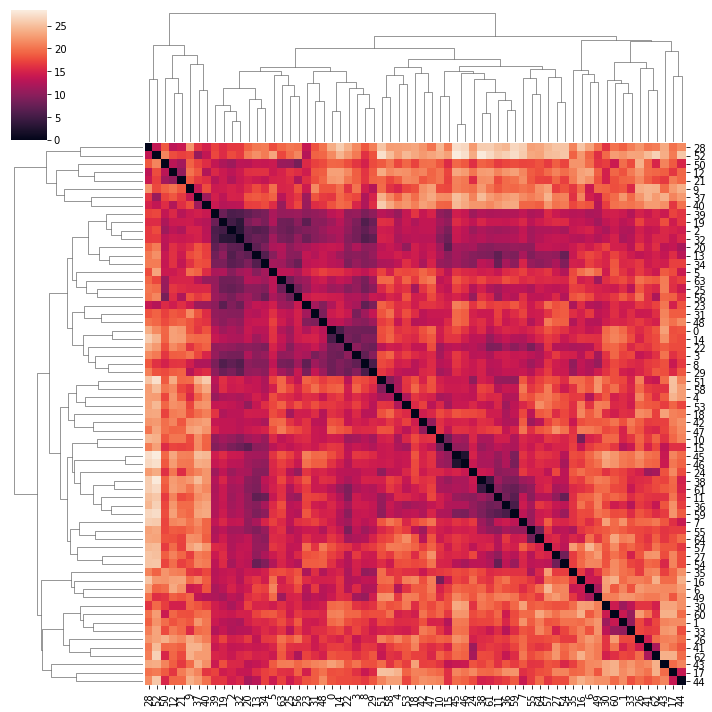

In [114]:
rdm = generate_RDM('loc')
sns.clustermap(rdm,yticklabels=1,xticklabels=1)

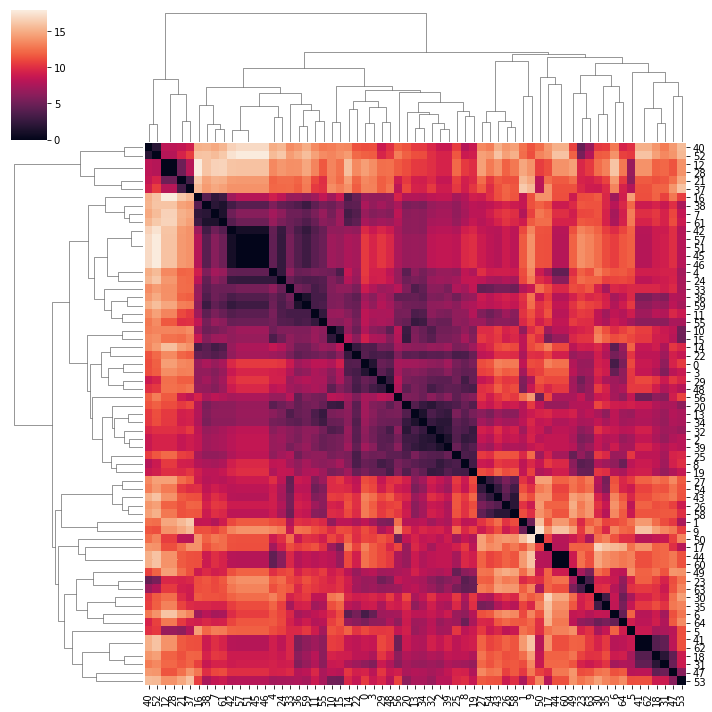

In [115]:
rdm = generate_RDM('vf')
sns.clustermap(rdm,yticklabels=1,xticklabels=1)

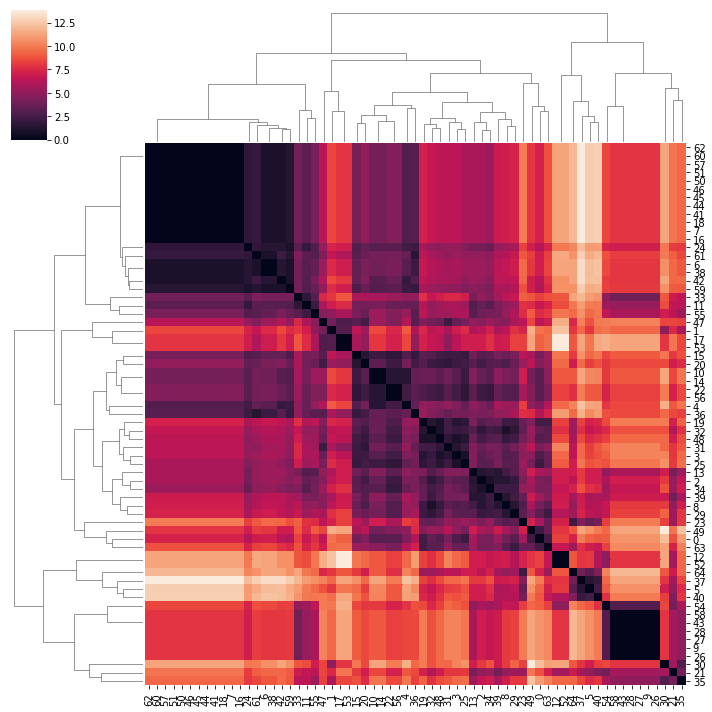

In [116]:
rdm = generate_RDM('ecc')
sns.clustermap(rdm,yticklabels=1,xticklabels=1)

In [117]:
bw_dependent = ['hndns','sex','eye']

In [118]:
def find_cluster(idx):
    cluster1 = [62,60,57,51,50,46,45,44,41,18,7,16,24,61,6,38,42,59,33,11,55]
    cluster2 = [47,1,17,53]
    cluster3 = [15,20,10,14,22,56,4,36,19,32,48,31,325,13,2,34,39,8,29,23,49,0,63]
    cluster4 = [12,52,64,37,5,40]
    cluster5 = [54,58,43,28,27,9,26,30,21,35]
    if(idx in cluster1):
        return 1
    elif(idx in cluster2):
        return 2
    elif(idx in cluster3):
        return 3
    elif(idx in cluster4):
        return 4
    else:
        return 5

clustering_data = []
for index, row in pse_df.iterrows():
    data_row = []
    data_row.append(row['sbj'])
    for j in bw_dependent:
        data_row.append(data[data['sbj']==row['sbj']][j].iloc[0])
    data_row.append(find_cluster(index))
    clustering_data.append(data_row)
clustering_df = pd.DataFrame(clustering_data, columns = ['sbj']+bw_dependent+['cluster'])
clustering_df

,sbj,hndns,sex,eye,cluster
0,8101004202,r,m,r,3
1,8106973112,r,m,r,2
2,8101004201,r,f,r,3
3,8101005022,r,f,l,5
4,8101990531,r,m,r,3
...,...,...,...,...,...
60,8101000633,r,m,l,1
61,8101003282,r,m,l,1
62,8101003791,r,f,l,1
63,8101004122,l,m,l,3


Feature 0: hndns, Score: 0.10345
Feature 1: sex, Score: 0.15770
Feature 2: eye, Score: 0.73885


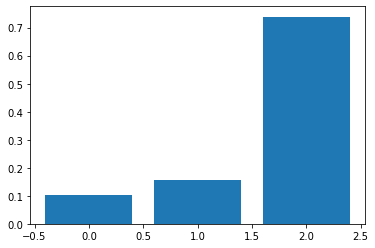

In [119]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X,y = clustering_df[bw_dependent].copy(),clustering_df['cluster']
X['hndns'] = clustering_df['hndns'].replace({'r':1,'l':0})
X['eye'] = clustering_df['eye'].replace({'r':1,'l':0})
X['sex'] = clustering_df['sex'].replace({'m':1,'f':0})
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %d: %s, Score: %.5f' % (i,bw_dependent[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [120]:
print('                ---------------- cluster ~ C(hndns) ----------------\n')
model = ols('cluster ~ C(hndns)', data = clustering_df).fit()
print(model.summary())
print('\n')

                ---------------- cluster ~ C(hndns) ----------------

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.648
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.204
Time:                        16:09:49   Log-Likelihood:                -115.87
No. Observations:                  65   AIC:                             235.7
Df Residuals:                      63   BIC:                             240.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [121]:
print('                ---------------- cluster ~ C(eye) ----------------\n')
model = ols('cluster ~ C(eye)', data = clustering_df).fit()
print(model.summary())
print('\n')

                ---------------- cluster ~ C(eye) ----------------

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                   0.03951
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.843
Time:                        16:09:50   Log-Likelihood:                -116.69
No. Observations:                  65   AIC:                             237.4
Df Residuals:                      63   BIC:                             241.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [122]:
print('                ---------------- cluster ~ C(sex) ----------------\n')
model = ols('cluster ~ C(sex)', data = clustering_df).fit()
print(model.summary())
print('\n')

                ---------------- cluster ~ C(sex) ----------------

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1514
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.699
Time:                        16:09:50   Log-Likelihood:                -116.64
No. Observations:                  65   AIC:                             237.3
Df Residuals:                      63   BIC:                             241.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------